In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
sample = [random.randint(0,10) for _ in range(30)]
print(f"Sample: {sample}")
print(f"Mean: {np.mean(sample)}")
print(f"Variance: {np.var(sample)}")
print(f"Median: {np.median(sample)}")

Sample: [3, 4, 3, 3, 0, 6, 1, 9, 1, 6, 10, 3, 5, 4, 2, 6, 8, 0, 3, 5, 6, 8, 7, 4, 2, 8, 6, 3, 2, 9]
Mean: 4.566666666666666
Variance: 7.445555555555556
Median: 4.0


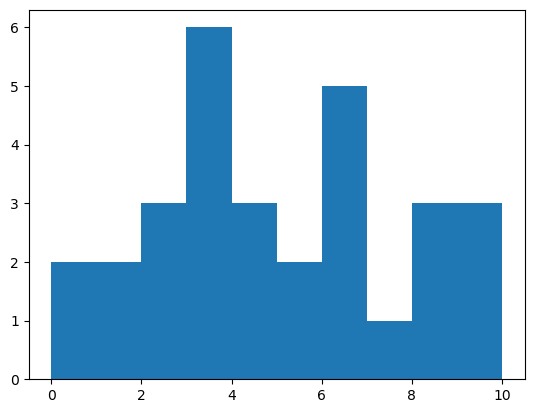

In [3]:
plt.hist(sample)
plt.show()


In [4]:
df = pd.read_csv("file:///C:/Users/v-joecamp/OneDrive%20-%20Microsoft/Desktop/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Height','Weight','Age'])
df

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [5]:
df[['Age', 'Height', 'Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

In [6]:
print(list(df['Height'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [7]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118081
Standard Deviation = 2.305818310517566


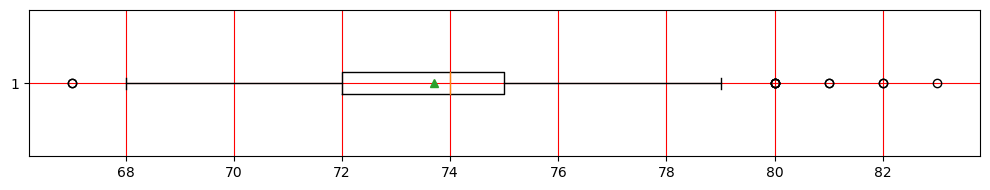

In [8]:
plt.figure(figsize=(10, 2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='red', linestyle='solid')
plt.tight_layout()
plt.show()

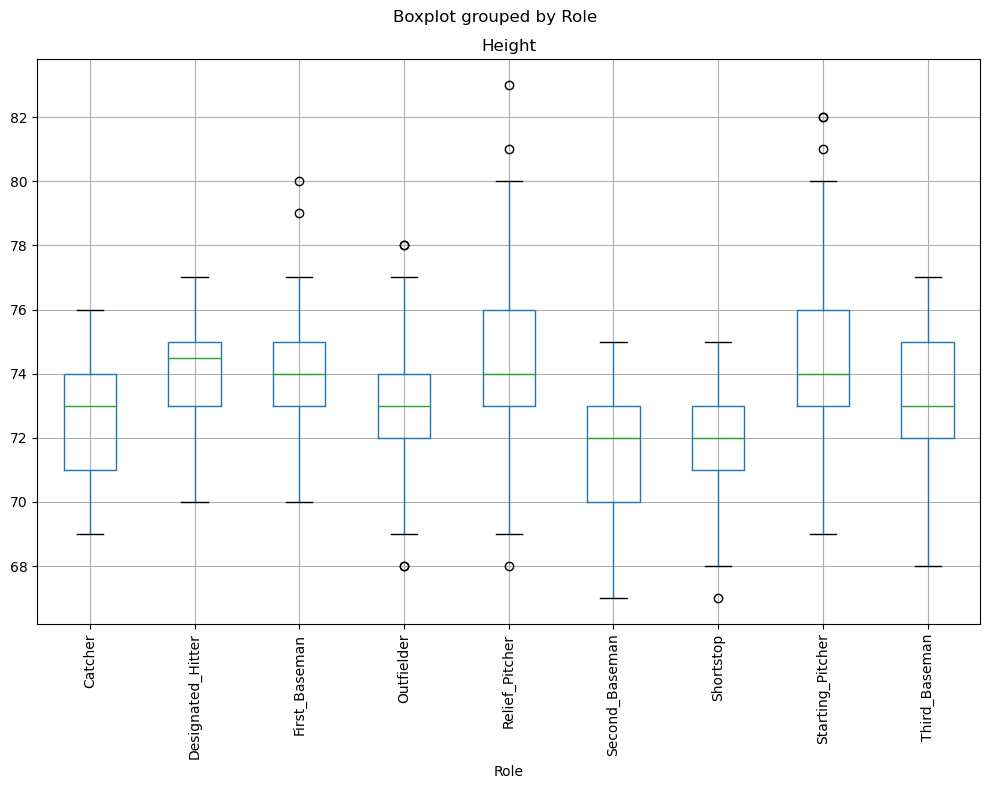

In [9]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

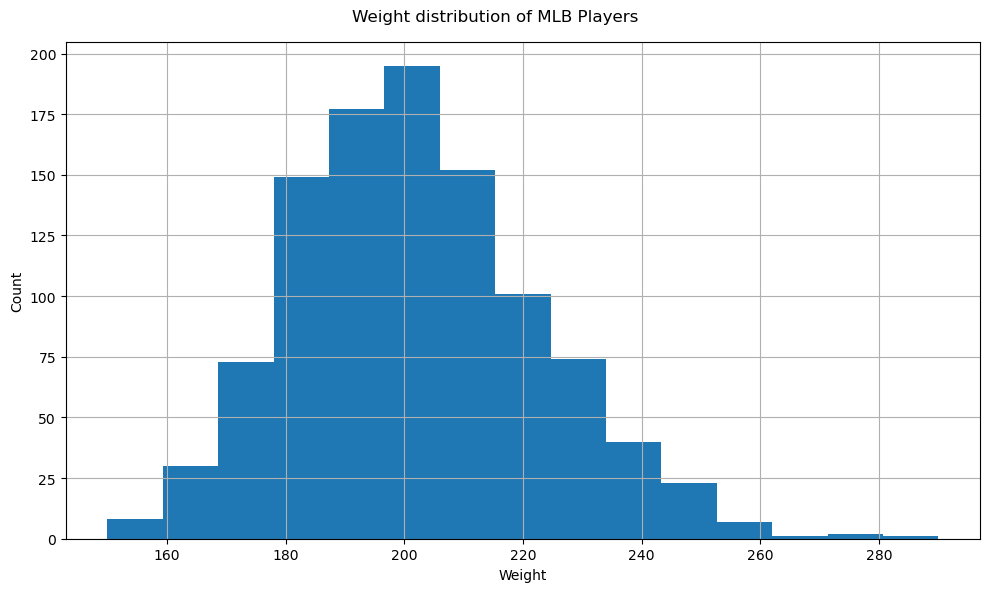

In [10]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([76.48872803, 72.97685613, 71.58843633, 73.45875603, 71.88198226,
       72.88491477, 76.78230877, 74.06188256, 72.13169826, 68.65334019,
       72.56993581, 70.05842652, 75.54774595, 74.71733086, 76.27921574,
       72.81831687, 76.72495263, 74.14130103, 73.8804719 , 69.96864498])

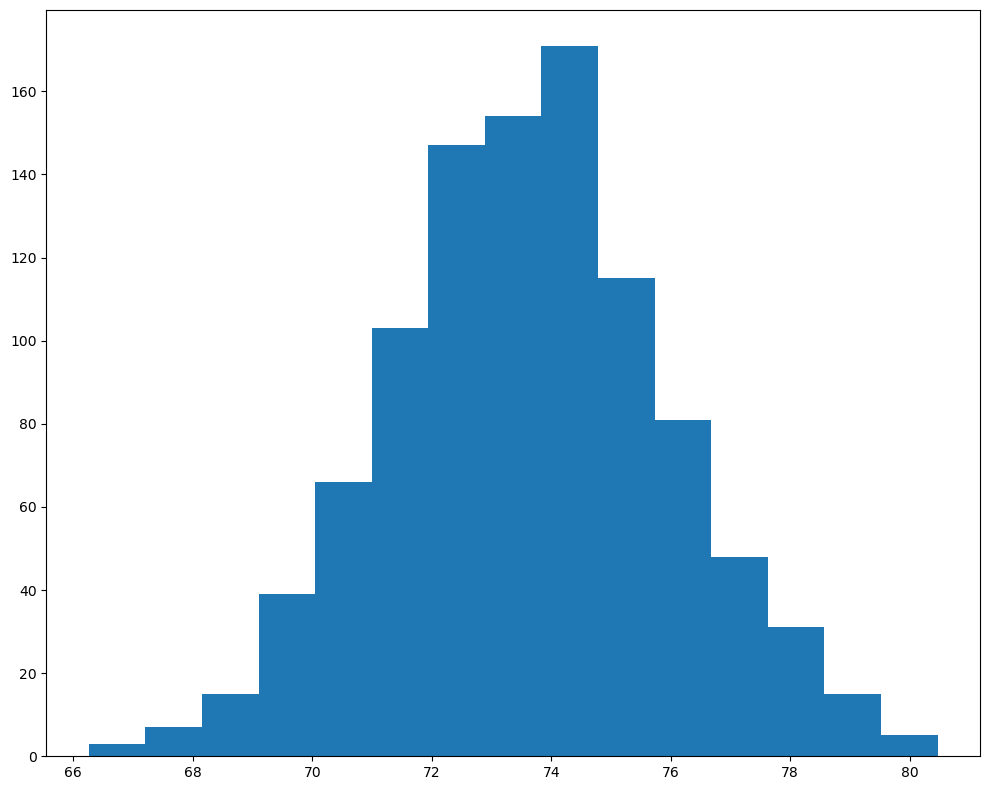

In [12]:
plt.figure(figsize=(10,8))
plt.hist(generated, bins = 15)
plt.tight_layout()
plt.show()

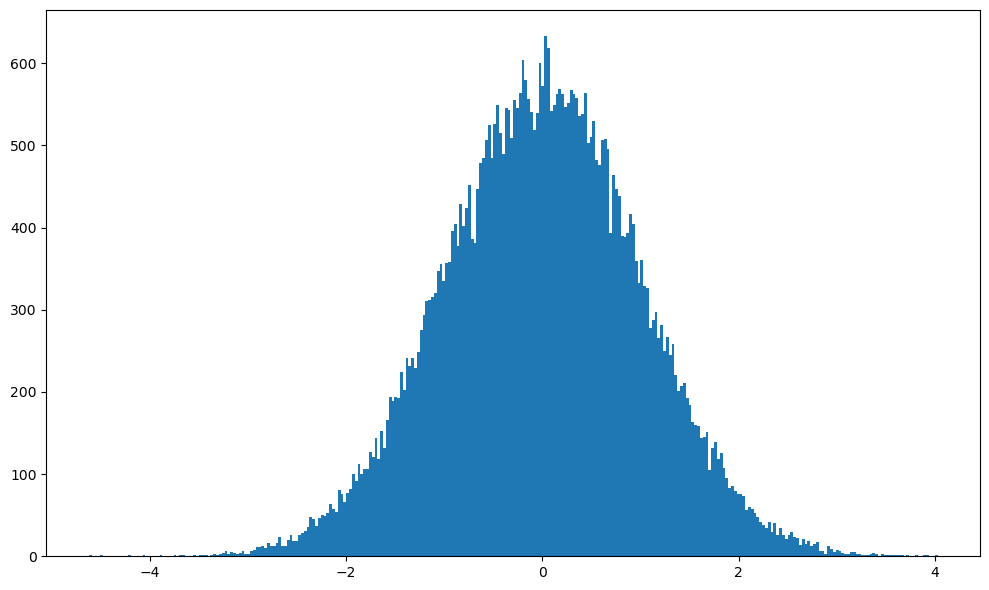

In [13]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

In [14]:
import scipy.stats

def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.75, 0.8, 0.85, 0.9, 0.95]:
    m,h, = mean_confidence_interval(df['Weight'].fillna(method='pad'), p)
    print(f"p={p:.2f}, mean = {m:.2f} +- {h:.2f}")

p=0.75, mean = 201.73 +- 0.75
p=0.80, mean = 201.73 +- 0.84
p=0.85, mean = 201.73 +- 0.94
p=0.90, mean = 201.73 +- 1.08
p=0.95, mean = 201.73 +- 1.28


In [15]:
df.groupby('Role').agg({'Height': 'mean', 'Weight': 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


In [17]:
for p in [0.75, 0.8, 0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.75, 1st basemen height: 73.69..74.31, 2nd basemen height: 71.10..71.62
Conf=0.80, 1st basemen height: 73.66..74.34, 2nd basemen height: 71.07..71.65
Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


In [20]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738959e-12


Correlation and Evil Baseball Corp

In [25]:
heights = df["Height"]
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:20])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181), (73, 1064.4973489967772), (73, 1064.4973489967772), (74, 1075.2469071629068), (74, 1075.2469071629068), (69, 1021.4991163322591), (70, 1032.2486744983887), (72, 1053.7477908306478), (73, 1064.4973489967772), (75, 1085.9964653290363), (78, 1118.245139827425)]


In [28]:
print(f"Covariance Matrix: \n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance Matrix: 
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.15323023054467
Correlation = 1.0


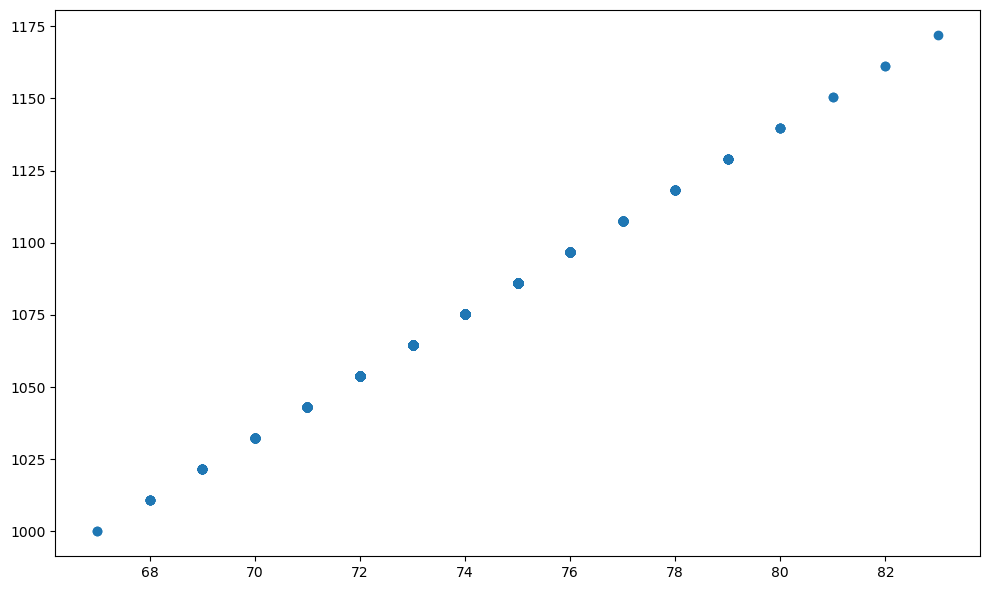

In [31]:
plt.figure(figsize =(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

In [33]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9835304456670811


In [36]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9327893086627033


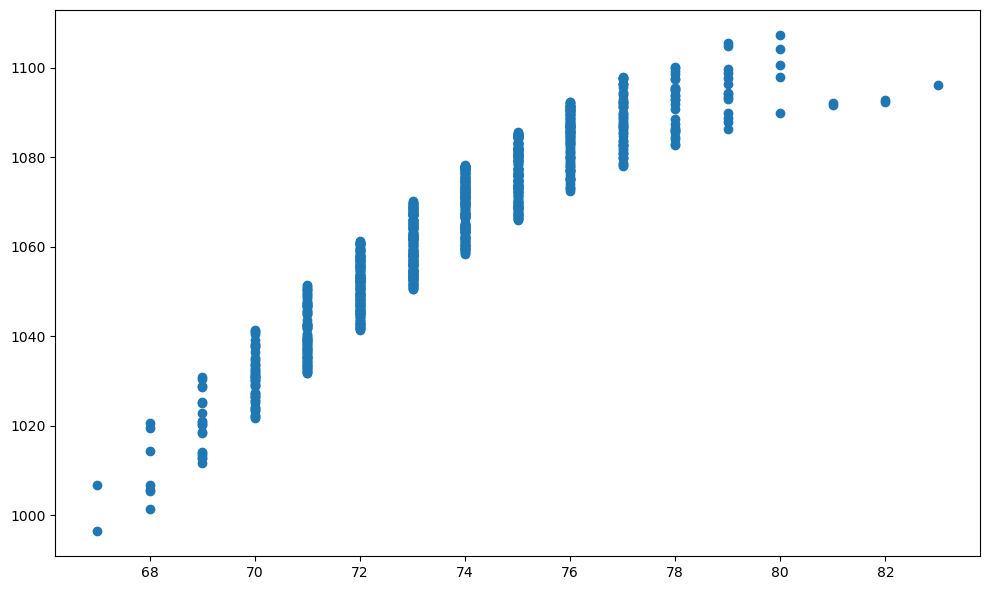

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

In [40]:
np.corrcoef(df['Height'], df['Weight'])

array([[ 1., nan],
       [nan, nan]])

In [41]:
np.corrcoef(df['Height'], df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

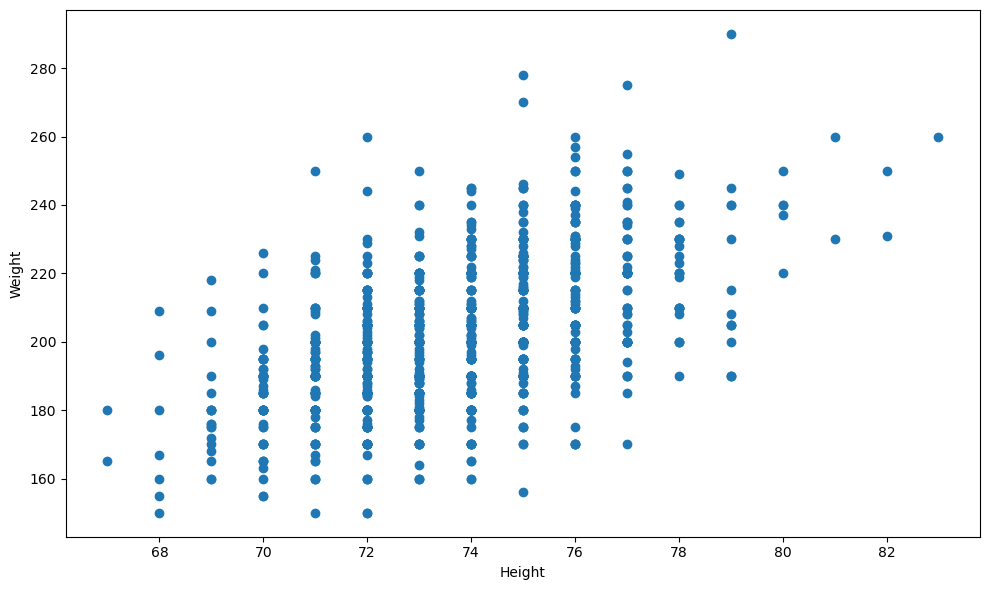

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()